In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('../Data/restaurant_1_2018-12-09.csv')
df = df.iloc[:, 1:]
df.head()

,store_id,promised delivery time,ordering time,latitude,longitude,delivery time (s),delivery time (m),distance,distance (m)
0,1,2018-12-09 07:30:00,2018-12-09 06:30:03,31.181756,121.536031,3597,59.0,0.327588,327.587678
1,1,2018-12-09 07:30:00,2018-12-09 06:30:07,31.189533,121.517909,3593,59.0,2.038446,2038.445562
2,1,2018-12-09 07:30:00,2018-12-09 06:30:09,31.201872,121.537751,3591,59.0,1.984581,1984.580871
3,1,2018-12-09 07:30:00,2018-12-09 06:30:14,31.185356,121.520827,3586,59.0,1.672082,1672.082205
4,1,2018-12-09 07:30:00,2018-12-09 06:30:16,31.188349,121.542251,3584,59.0,0.613970,613.970415


In [16]:
df.shape

(712, 9)

In [17]:
BBox = (df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max())
BBox

(121.517419, 121.559605, 31.16372, 31.202911)

In [18]:
locations = list(zip(df['longitude'], df['latitude']))

In [21]:
locations

[(121.536031, 31.181756),
 (121.517909, 31.189533),
 (121.537751, 31.201872),
 (121.520827, 31.185356),
 (121.542251, 31.188349),
 (121.533592, 31.19144),
 (121.530625, 31.196642),
 (121.534535, 31.191613),
 (121.548553, 31.189531),
 (121.534977, 31.192338),
 (121.55065, 31.188228),
 (121.539749, 31.189481),
 (121.535599, 31.182894),
 (121.534663, 31.191907),
 (121.551153, 31.189935),
 (121.536289, 31.197037),
 (121.533991, 31.191228),
 (121.555513, 31.177098),
 (121.546134, 31.176572),
 (121.543506, 31.172315),
 (121.542592, 31.172311),
 (121.541004, 31.189661),
 (121.542301, 31.192392),
 (121.539775, 31.171667),
 (121.541444, 31.189282),
 (121.536922, 31.192183),
 (121.537045, 31.19161),
 (121.530643, 31.189467),
 (121.532099, 31.188831),
 (121.527957, 31.184677),
 (121.536995, 31.172514),
 (121.52356, 31.181107),
 (121.5307, 31.19503),
 (121.537091, 31.172929),
 (121.52421, 31.183205),
 (121.557635, 31.176729),
 (121.531156, 31.198847),
 (121.540517, 31.191042),
 (121.530744, 31.197

In [19]:
import folium

m = folium.Map(location=[31.184317, 121.537945], zoom_start=15.5, tiles='Stamen Toner')

for l in locations:
    folium.CircleMarker(location=[l[0], l[1]], radius=1, color='red', popup=[l[0], l[1]]).add_to(m)

m


In [20]:
south = [31.16372, 121.532229]
north = [31.202911, 121.541188]
east = [31.177209, 121.559605]
west = [31.1917, 121.517419]

In [11]:
df['ordering time'] = pd.to_datetime(df['ordering time'])
df['ordering time']

0     2018-12-09 06:30:03
1     2018-12-09 06:30:07
2     2018-12-09 06:30:09
3     2018-12-09 06:30:14
4     2018-12-09 06:30:16
              ...        
707   2018-12-09 21:11:16
708   2018-12-09 17:01:06
709   2018-12-09 17:15:51
710   2018-12-09 17:20:57
711   2018-12-09 20:01:38
Name: ordering time, Length: 712, dtype: datetime64[ns]

In [12]:
# time interval
df['ordering time'].min(), df['ordering time'].max()

(Timestamp('2018-12-09 06:30:03'), Timestamp('2018-12-09 21:11:16'))

In [13]:
df['order hour'] = df['ordering time'].dt.hour
df.head()

,store_id,promised delivery time,ordering time,latitude,longitude,delivery time (s),delivery time (m),distance,distance (m),order hour
0,1,2018-12-09 07:30:00,2018-12-09 06:30:03,31.181756,121.536031,3597,59.0,0.327588,327.587678,6
1,1,2018-12-09 07:30:00,2018-12-09 06:30:07,31.189533,121.517909,3593,59.0,2.038446,2038.445562,6
2,1,2018-12-09 07:30:00,2018-12-09 06:30:09,31.201872,121.537751,3591,59.0,1.984581,1984.580871,6
3,1,2018-12-09 07:30:00,2018-12-09 06:30:14,31.185356,121.520827,3586,59.0,1.672082,1672.082205,6
4,1,2018-12-09 07:30:00,2018-12-09 06:30:16,31.188349,121.542251,3584,59.0,0.613970,613.970415,6


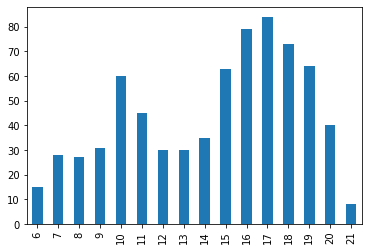

In [14]:
ax = df['order hour'].value_counts(sort=False).plot.bar()